# 0.0 Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 0.1 Funções auxiliares

In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.rcParams['figure.figsize'] = (11,7)

#warnings.filterwarnings('ignore')


# 1.0 Dataset

## 1.1 Importando dataset

In [3]:
data = pd.read_csv('kc_house_data.csv')

## 1.2 Conhecendo o dataset

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049194.00,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
len(data['id'].unique())

21436

In [9]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

In [10]:
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [11]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [12]:
data[['sqft_living', 'sqft_living15']]

,sqft_living,sqft_living15
0,1180,1340
1,2570,1690
2,770,2720
3,1960,1360
4,1680,1800
...,...,...
21608,1530,1530
21609,2310,1830
21610,1020,1020
21611,1600,1410


In [13]:
data[['sqft_lot', 'sqft_lot15']]

,sqft_lot,sqft_lot15
0,5650,5650
1,7242,7639
2,10000,8062
3,5000,5000
4,8080,7503
...,...,...
21608,1131,1509
21609,5813,7200
21610,1350,2007
21611,2388,1287


## 1.3 Limpeza de dados

### 1.3.1 Alteração de tipo de variável

In [14]:
data['date'] = pd.to_datetime (data['date'])
data['bathrooms'] = data['bathrooms'].astype(np.int64)
data['floors'] = data['floors'].astype(np.int64)
data['sqft_living15'] = data['sqft_living15'].astype(float)
data['sqft_lot15'] = data['sqft_lot15'].astype(float)
data['sqft_above'] = data['sqft_above'].astype(float)
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [15]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

### 1.3.2 Manipulação das Features

In [16]:
# Exclusão de colunas

data.drop(columns=['sqft_living15', 'sqft_lot15'], inplace = True)

In [17]:
# Analisando valores duplicados na coluna 'id' 

data.loc[data['id'].duplicated(keep=False)].sort_values(['id', 'date']).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
2496,1000102,2014-09-16,280000.00,6,3,2400,9373,2,0,0,3,7,2400.00,0.00,1991,0,98002,47.33,-122.21
2497,1000102,2015-04-22,300000.00,6,3,2400,9373,2,0,0,3,7,2400.00,0.00,1991,0,98002,47.33,-122.21
16814,7200179,2014-10-16,150000.00,2,1,840,12750,1,0,0,3,6,840.00,0.00,1925,0,98055,47.48,-122.21
16815,7200179,2015-04-24,175000.00,2,1,840,12750,1,0,0,3,6,840.00,0.00,1925,0,98055,47.48,-122.21
11433,109200390,2014-08-20,245000.00,3,1,1480,3900,1,0,0,4,7,1480.00,0.00,1980,0,98023,47.30,-122.37


In [18]:
# deletando valores duplicados

data = data.drop_duplicates(subset = ['id'], keep = 'last')

data.loc[data['id'].duplicated(keep=False)].sort_values(['id', 'date']).head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [19]:
# deletando outlier 'bedrooms' = 33

data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15870,2402100895,2014-06-25,640000.00,33,1,1620,6000,1,0,0,5,7,1040.00,580.00,1947,0,98103,47.69,-122.33


In [20]:
#com base no tamanho do terreno, sendo um imóvel de um unico pavimento, este imóvel com 33 quartos é considerado
#outlier e será excluido da base de dados.

In [21]:
data = data.drop(15870)

In [22]:
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long


In [23]:
# Criação de nova feature com a conversão do valor de sqft para m²

data['m2_living'] = data['sqft_living']*0.09290304

data['m2_lot'] = data['sqft_lot']*0.09290304

In [24]:
data[['sqft_living', 'm2_living', 'sqft_lot' , 'm2_lot']]

,sqft_living,m2_living,sqft_lot,m2_lot
0,1180,109.63,5650,524.90
1,2570,238.76,7242,672.80
2,770,71.54,10000,929.03
3,1960,182.09,5000,464.52
4,1680,156.08,8080,750.66
...,...,...,...,...
21608,1530,142.14,1131,105.07
21609,2310,214.61,5813,540.05
21610,1020,94.76,1350,125.42
21611,1600,148.64,2388,221.85


In [25]:
# Criando nova feature para descrever a condição das casas

data['condition_type'] = data['condition'].apply (lambda x: 'bad' if x <= 2  
                                                         else 'regular' if (x == 3) | (x == 4)  
                                                         else 'good')

In [26]:
data['condition_type']

0        regular
1        regular
2        regular
3           good
4        regular
          ...   
21608    regular
21609    regular
21610    regular
21611    regular
21612    regular
Name: condition_type, Length: 21435, dtype: object

In [119]:
# Criando nova feature para descrever o tipo de vista (boa ou ruim)

data['condition_view'] = data['view'].apply (lambda x: 'bad' if x <= 2  
                                                        else 'good')

In [122]:
data['condition_view']

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
21608    bad
21609    bad
21610    bad
21611    bad
21612    bad
Name: condition_view, Length: 21435, dtype: object

In [27]:
# Criando nova feature para segmentar ano de construção com relação a ano

data ['built'] = data['yr_built'].apply(lambda x: 'anterior à 1955' if x <= 1955
                                                else 'posterior à 1955')



In [28]:
# Criando nova feature para identificar imóveis com e sem porão

data['basement'] = data['sqft_basement'].apply (lambda x: 'com porão' if x > 0 else 'sem porão')

In [29]:
# Criando novas features para segmentar por mês e ano

data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [30]:
# Criando novas features para unificar imóveis reformados e não reformados

data['renovated'] = data['yr_renovated'].apply(lambda x:'sim' if x > 0 else 'não')

In [31]:
# Criando nova feature para segmentar estações do ano (sazonalidade)

data['season'] = data['month'].apply(lambda x:'spring' if 3 <= x <= 5 else
                                              'summer' if 6 <= x <= 8 else
                                              'autumn' if 9 <= x <= 11 else
                                              'winter' )

In [32]:
#Estatísticas

valores_est = data[['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'm2_living', 'm2_lot']]

data.statistic = pd.DataFrame (valores_est.describe().T)

data.statistic.columns = ['Count', 'Media', 'STD', 'Min', '25%', 'Mediana', '75%', 'Max']
data.statistic 


C:\Users\ivero\AppData\Local\Temp\ipykernel_10672\1178670103.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.statistic = pd.DataFrame (valores_est.describe().T)


,Count,Media,STD,Min,25%,Mediana,75%,Max
price,21435.00,541645.37,367322.88,75000.00,324844.00,450000.00,645000.00,7700000.00
bedrooms,21435.00,3.37,0.91,0.00,3.00,3.00,4.00,11.00
bathrooms,21435.00,1.75,0.73,0.00,1.00,2.00,2.00,8.00
floors,21435.00,1.45,0.55,1.00,1.00,1.00,2.00,3.00
waterfront,21435.00,0.01,0.09,0.00,0.00,0.00,0.00,1.00
m2_living,21435.00,193.49,85.39,26.94,132.85,178.37,236.90,1257.91
m2_lot,21435.00,1406.19,3859.15,48.31,468.23,707.36,993.74,153416.27


In [34]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,m2_living,m2_lot,condition_type,built,basement,month,year,renovated,season
0,7129300520,2014-10-13,221900.00,3,1,1180,5650,1,0,0,...,-122.26,109.63,524.90,regular,anterior à 1955,sem porão,10,2014,não,autumn
1,6414100192,2014-12-09,538000.00,3,2,2570,7242,2,0,0,...,-122.32,238.76,672.80,regular,anterior à 1955,com porão,12,2014,sim,winter
2,5631500400,2015-02-25,180000.00,2,1,770,10000,1,0,0,...,-122.23,71.54,929.03,regular,anterior à 1955,sem porão,2,2015,não,winter
3,2487200875,2014-12-09,604000.00,4,3,1960,5000,1,0,0,...,-122.39,182.09,464.52,good,posterior à 1955,com porão,12,2014,não,winter
4,1954400510,2015-02-18,510000.00,3,2,1680,8080,1,0,0,...,-122.05,156.08,750.66,regular,posterior à 1955,sem porão,2,2015,não,winter


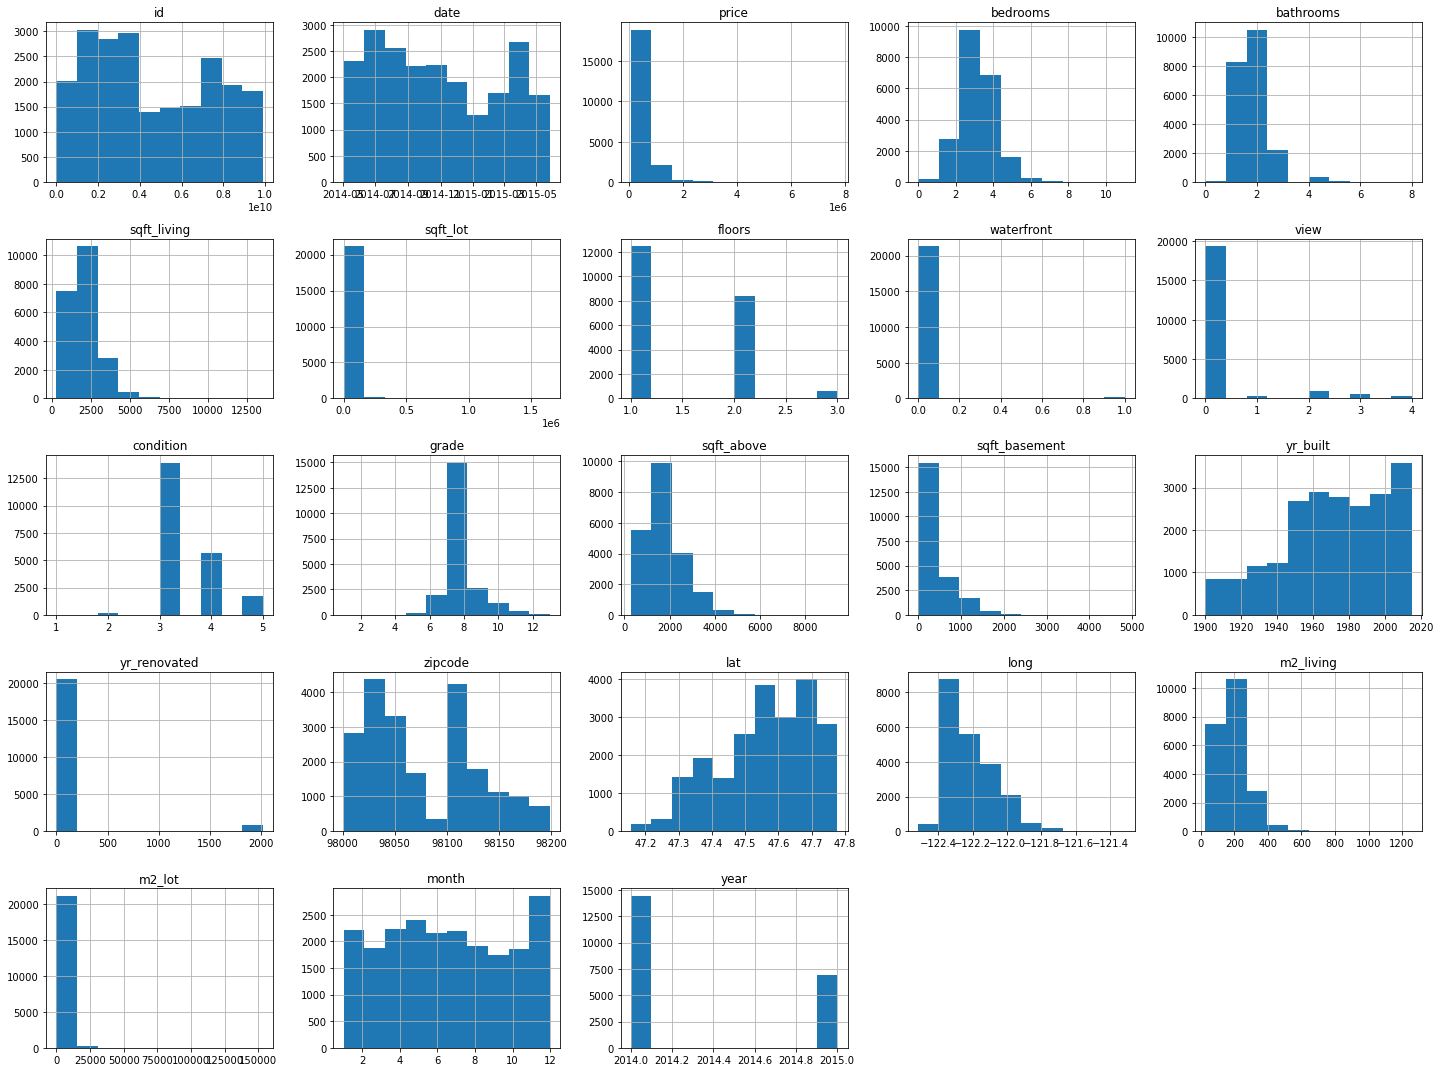

In [35]:
data.hist(figsize=(20,15));
plt.tight_layout()
plt.show()

## 2.0 Exploração de dados

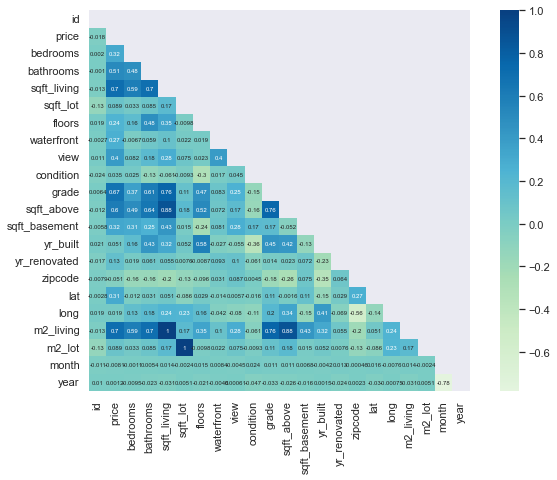

In [127]:
matrix = np.triu(data.corr())

sns.heatmap(data.corr(), cmap = 'GnBu', square = True, annot=True, annot_kws={"size":6}, cbar_kws={"shrink":1}, center = 0,
             mask = matrix);

#sns.heatmap(data.corr(),linewidths=0.50,vmax=1,square=True,cmap="GnBu",linecolor='w',
 #           annot=True, annot_kws={"size":6}, cbar_kws={"shrink":1}, mask = matrix)

## 1. Criar visualizações para responder as hipoteses de negócio

### H1: Imóveis que possuem vista para água, são, em média, 30% mais caros.

#### Hipótese falsa

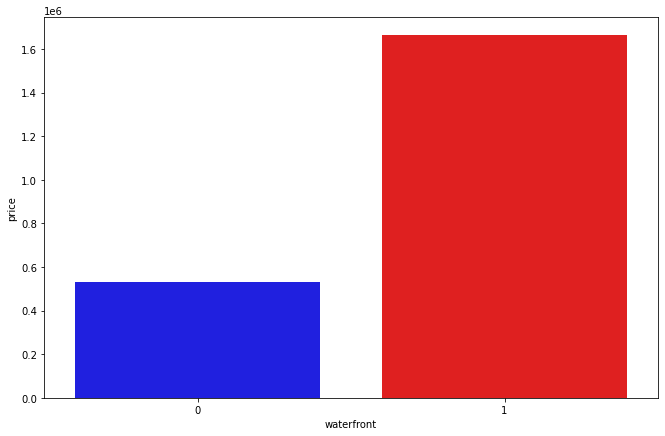

Imóveis com vista para água são, em média, 211.76% mais caros.


In [38]:
h1 = data[['price', 'waterfront']].groupby (['waterfront']).mean().reset_index()

sns.barplot(x='waterfront', y='price', data = h1, palette=['b','r'] )
plt.show()

h1['percent'] = h1 ['price'].pct_change()
print (f'Imóveis com vista para água são, em média, {h1.iloc[1,2]:.2%} mais caros.')

### H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

#### Hipótese Falsa


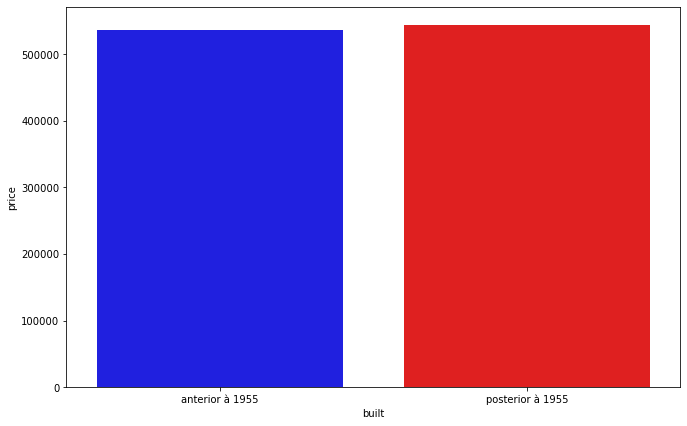

Imóveis de construção anterior à 1955 são, em média, 1.40% mais baratos.


In [39]:
h2 = data [['price', 'built']].groupby (['built']).mean().reset_index()

sns.barplot(x='built', y='price', data = h2, palette=['b','r'])
plt.show()

h2['percent'] = h2 ['price'].pct_change()
print (f'Imóveis de construção anterior à 1955 são, em média, {h2.iloc[1,2]:.2%} mais baratos.')

### H3: Imóveis sem porão possuem área total ('sqrt_lot') 50% maiores do que imóveis com porão.

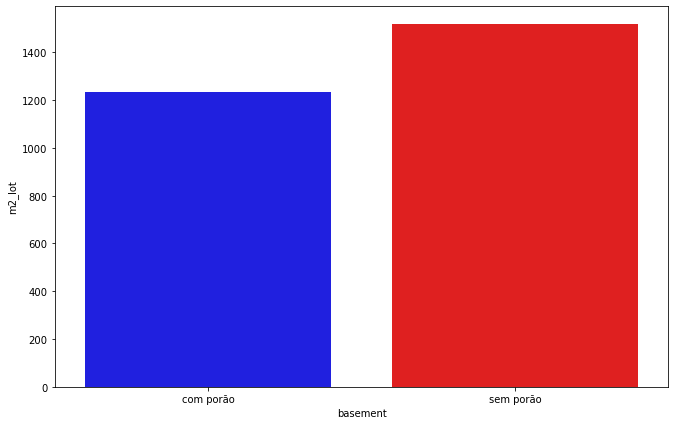

Imóveis sem porão tem área total, em média, 22.78% maiores do que os imóveis sem porão.


In [40]:
h3 = data[['basement', 'm2_lot']].groupby (['basement']).mean().reset_index()

sns.barplot(x='basement', y='m2_lot', data = h3, palette=['b','r'] )
plt.show()

h3['percent'] = h3 ['m2_lot'].pct_change()
print (f'Imóveis sem porão tem área total, em média, {h3.iloc[1,2]:.2%} maiores do que os imóveis sem porão.')


### H4: O crescimento do preço dos imóveis YoY ( Year over Year ) é de 10%.



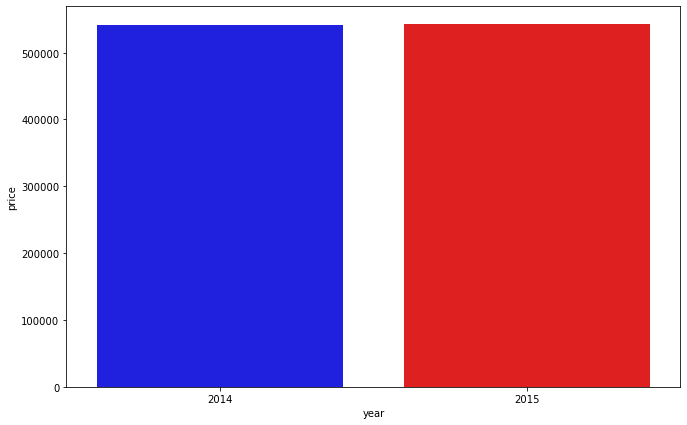

O crescimento do preço dos imóveis variou em média, 0.18% ano a ano.


In [41]:
h4 = data[['year', 'price']].groupby ('year').mean().reset_index()

sns.barplot(x='year', y='price', data=h4, palette=['b','r'])
plt.show()

h4['percent'] = h4['price'].pct_change()
print (f'O crescimento do preço dos imóveis variou em média, {h4.iloc[1,2]:.2%} ano a ano.')



In [42]:
data[['year', 'price']].groupby ('year').count().reset_index()

,year,price
0,2014,14463
1,2015,6972


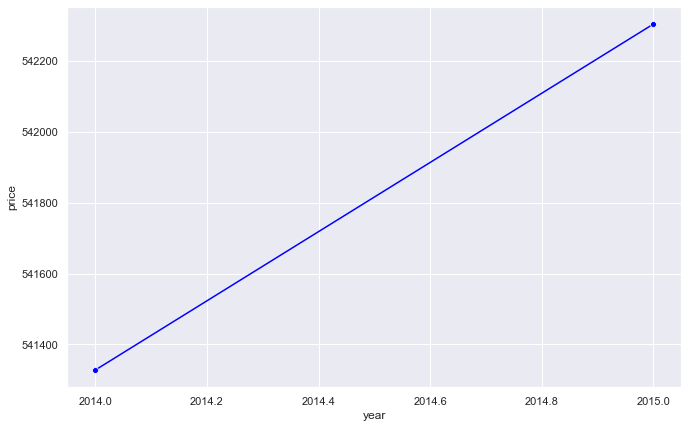

In [43]:
sns.set_theme()
sns.lineplot(data = h4, x = 'year',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'blue');

In [44]:
##YoY = (período atual – período anterior) / período anterior x 100

( (h4.loc[1,'price']) - (h4.loc[0,'price']) ) / (h4.loc[0,'price']) * 100

0.18039255580595198

### H5: O crescimento do preço dos imóveis MoM ( Month over Month ) é de 5%.

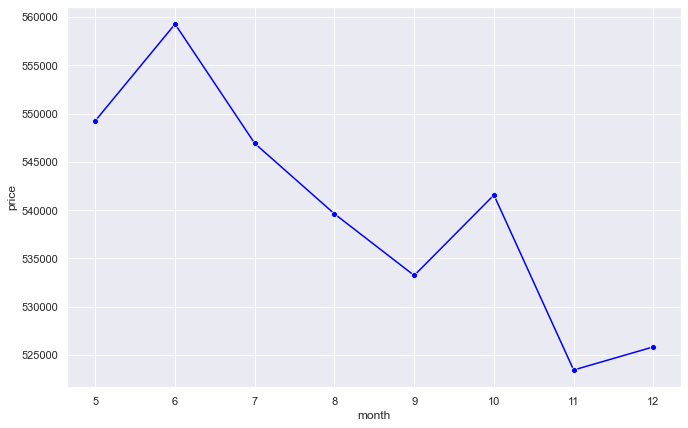

In [45]:
h5_14 = data [(data['year'] == 2014)]

h5_14 = h5_14[['month', 'price']].groupby ('month').mean().reset_index()

sns.set_theme()
sns.lineplot(data = h5_14, x = 'month',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'blue');

In [113]:
h5_14[['month', 'price']].groupby('month').mean().reset_index()

h5_14['crescimento'] = h5_14['price'].pct_change()

h5_14

,month,price,crescimento
0,5,549257.04,NaN
1,6,559266.99,0.02
2,7,546903.58,-0.02
3,8,539608.15,-0.01
4,9,533229.23,-0.01
5,10,541560.38,0.02
6,11,523436.61,-0.03
7,12,525832.01,0.00


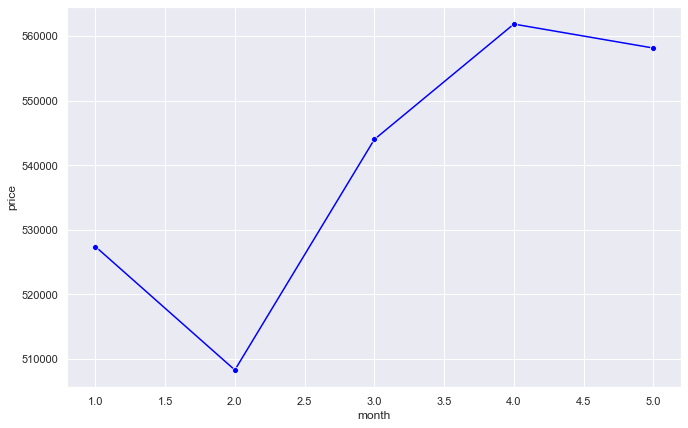

In [46]:
h5_15 = data [(data['year'] == 2015)]

h5_15 = h5_15[['month', 'price']].groupby ('month').mean().reset_index()

sns.set_theme()
sns.lineplot(data = h5_15, x = 'month',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'blue');

In [114]:
h5_15[['month', 'price']].groupby('month').mean().reset_index()

h5_15['crescimento'] = h5_14['price'].pct_change()

h5_15

,month,price,crescimento
0,1,527397.46,NaN
1,2,508276.17,0.02
2,3,543977.19,-0.02
3,4,561837.77,-0.01
4,5,558126.81,-0.01


### H6: Imóveis com 3 banheiros tem um crescimento MoM ( Month over Month ), no ano de 2015 de 15%.



In [47]:
data['bathrooms'].unique()

array([1, 2, 3, 4, 0, 5, 6, 8, 7], dtype=int64)

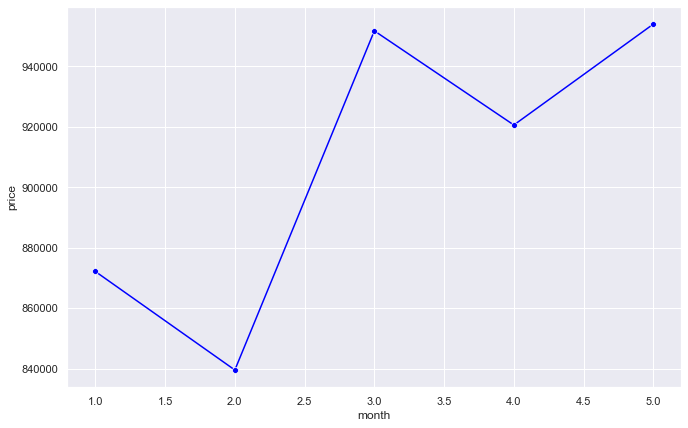

In [48]:
h6 = data [(data['year'] == 2015)]

h6 = h6 [(h6['bathrooms'] == 3)]

h6 = h6[['month', 'price']].groupby('month').mean().reset_index()

sns.set_theme()
sns.set_context('notebook')
sns.lineplot(data = h6, x = 'month',  y = 'price', 
             markers = True, style = (1), legend = False, 
             color = 'blue');

In [115]:
h6['crescimento'] = h5_14['price'].pct_change()

h6

,month,price,crescimento
0,1,872100.00,NaN
1,2,839514.86,0.02
2,3,951685.22,-0.02
3,4,920543.98,-0.01
4,5,953925.47,-0.01


### H7: Imóveis reformados são, em média 40% mais caros que os imóveis não reformados.

In [49]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

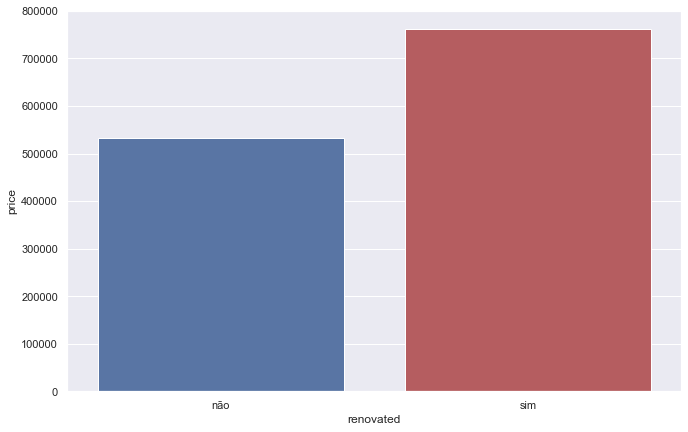

Imóveis reformados são, em média 43.29% mais caros que os não reformados.


In [50]:
h7 = data[['renovated', 'price']].groupby ('renovated').mean().reset_index()

sns.barplot(x='renovated', y='price', data=h7, palette=['b','r'])
plt.show()

h7['percent'] = h7['price'].pct_change()
print (f'Imóveis reformados são, em média {h7.iloc[1,2]:.2%} mais caros que os não reformados.')


### H8: Imóveis anteriores a 1955 e não renovados são 5% mais baratos.


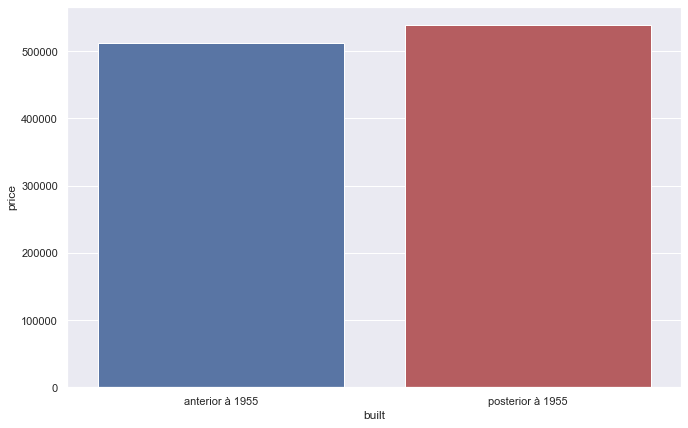

Imóveis com data de construção anterior à 1955 e não reformados são, em média 5.19% mais baratos.


In [51]:
h8 = data[data['renovated'] == 'não']

h8 = h8[['built', 'price']].groupby ('built').mean().reset_index()

sns.barplot(x='built', y='price', data=h8, palette=['b', 'r'])
plt.show()

h8['percent'] = h8['price'].pct_change()
print (f'Imóveis com data de construção anterior à 1955 e não reformados são, em média {h8.iloc[1,2]:.2%} mais baratos.')

### H9: Imóveis em más condições (condition_type = bad) mas com boa vista, são 25% mais caros.

In [117]:
data['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

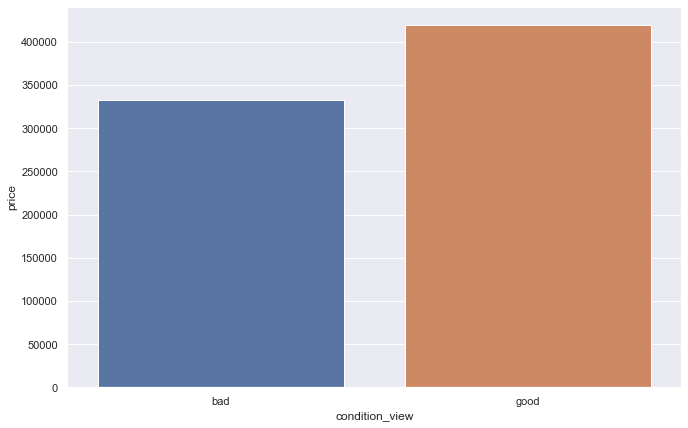

Imóveis em más condições e com boa vista são, em média 26.14% mais caros que imóveis com más condições e com vista ruim.


In [124]:
h9 =  data[data ['condition_type'] == 'bad']

h9 = h9[['condition_view', 'price']].groupby ('condition_view').mean().reset_index()

sns.barplot (x = 'condition_view', y = 'price', data = h9)
plt.show ()

h9['percent'] = h9['price'].pct_change()

print (f'Imóveis em más condições e com boa vista são, em média {h9.iloc[1,2]:.2%} mais caros que imóveis com más condições e com vista ruim.')

### H10: Imóveis com número de quartos maior são 5% mais caros.

In [54]:
data ['beds'] = data ['bedrooms'].apply (lambda x:'0-3' if (x >= 0 ) & (x <= 3) else
                                                   '4-7' if (x >= 4) & (x <= 7) else
                                                   '8-11')

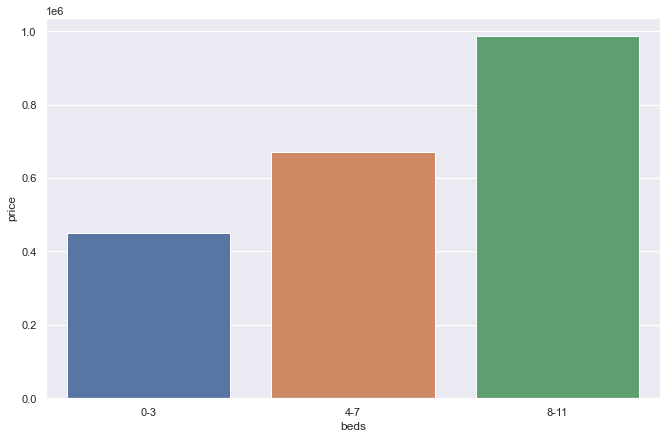

Imóveis com 4-7 quartos são, em média 48.79% mais caros que imóveis com 0-3 quartos, uma vez que os imóveis com 8-11 quartos são 98730430.43% mais caros que os de 4-7 quartos.


In [126]:
h10 = data[['beds','price']].groupby ('beds').mean().reset_index()

sns.barplot (x = 'beds', y = 'price', data = h10)
plt.show ()

h10['percent'] = h10['price'].pct_change()

print (f'Imóveis com 4-7 quartos são, em média {h10.iloc[1,2]:.2%} mais caros que imóveis com 0-3 quartos, uma vez que os imóveis com 8-11 quartos são {h10.iloc[2,1]:.2%} mais caros que os de 4-7 quartos.')

In [56]:
h10 

,beds,price,percent
0,0-3,451303.31,NaN
1,4-7,671508.64,0.49
2,8-11,987304.30,0.47


# 2. Construir uma tabela com recomendações de compra ou não compra

### 1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

    * Agrupar por zipcode (area);
    * Definir a mediana do preço do imóvel, dentro de cada região (A mediana é o valor central de um conjunto de números colocados por ordem de grandeza. Trata-se do número que se encontra exatamente no centro, de modo que 50% dos números são superiores e 50% são inferiores a essa mediana.);
    * Indicar os imóveis com valor abaixo da mediana, em boas condições, como sugestão de compra.

In [70]:
zipcode = data[['zipcode','price']].groupby ('zipcode').median().reset_index()

df = pd.merge (zipcode, data, on='zipcode', how='inner')

df = df.rename(columns = {'price_y': 'price', 'price_x': 'price_median'})

for i, row in df.iterrows():
    if (row['price_median'] >= row['price']) & ((row['condition_type'] == 'good') | (row['condition_type'] == 'regular')):
        df.loc[i,'buy'] =  'compra'
    else:
        df.loc[i, 'buy'] = 'nao compra'
        

In [71]:
compra = df[df['buy'] == 'compra']

compra['buy'].shape[0]
insight1 = compra[['id', 'price', 'buy']]
insight1


,id,price,buy
5,3353400435,230000.00,compra
6,9262800171,252000.00,compra
7,3353401710,227950.00,compra
8,8159610030,196000.00,compra
10,7967200060,243000.00,compra
...,...,...,...
21428,2771604196,465000.00,compra
21429,2770601457,542300.00,compra
21430,2770601912,570000.00,compra
21433,2770601782,453000.00,compra


In [72]:
insight1.to_csv('compra.csv')

### 2. Uma vez a casa comprada, qual o melhor momento para vendê-las e por qual preço?

    * Agrupar por zipcode (area) e por sazonalidade (estações do ano); ##hipotese de diferenciação na venda
    * Definir a mediana do preço por area e sazonalidade;
    * Indicar os imoveis com sugestão de venda, de acordo com as seguintes condições:
            * Se o preço de compra, for maior que a mediana da região por sazonalidade, o preço de venda deve ser igual ao preço de compra acrescido 10%
        * Se o preço de compra, for menor que a mediana da regiaão por sazonalidade, o preço de venda deve ser o preço de compra acrescido 30%

In [86]:
df2 = data[['price', 'season', 'zipcode']].groupby (['zipcode', 'season']).median().reset_index()

df2 = df2.rename(columns = {'price': 'price_median_season'})

df3 = pd.merge (df2, df, on='zipcode', how='inner')

df3 = df3.rename(columns = {'season_x': 'season'})

for i, row in df3.iterrows():
    if (row['price'] >= row['price_median_season']):
        df3.loc[i,'sale'] = row['price']*1.10
    else:
        df3.loc[i, 'sale'] = row['price']*1.30

In [87]:
df3 ['profit'] = df3['sale'] - df3['price']

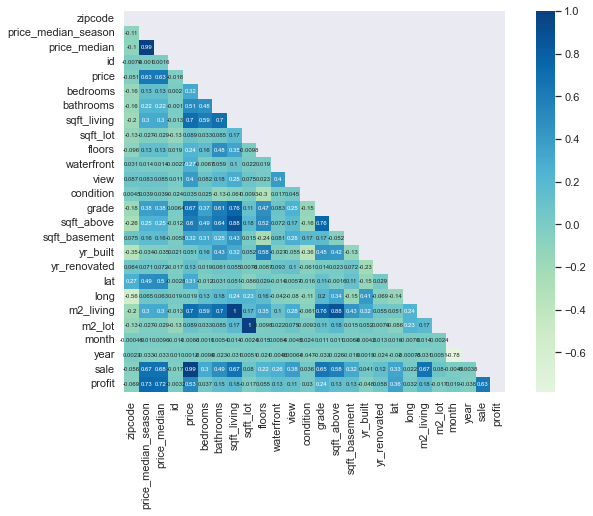

In [128]:
matrix = np.triu(df3.corr())

sns.heatmap(df3.corr(), cmap = 'GnBu', square = True, annot=True, annot_kws={"size":6}, cbar_kws={"shrink":1}, center = 0,
             mask = matrix);


In [104]:
df4 = df3 [df3['buy'] == 'compra']

df4 = df4[['id','price','zipcode','price_median', 'season', 'price_median_season', 'condition_type','buy', 'sale','profit']].sort_values(['id', 'profit'], ascending =False)

df4 = df4.drop_duplicates(subset = ['id'], keep = 'first')

## Definição do melhor momento e valor para venda
season_value = df4 [['id', 'season', 'sale']]
season_value

,id,season,sale
78931,9900000190,autumn,349635.00
14928,9895000040,autumn,519870.00
69975,9842300540,autumn,440700.00
70259,9842300485,spring,494000.00
70126,9842300095,autumn,474500.00
...,...,...,...
64572,7400062,autumn,389740.00
35932,7200179,autumn,227500.00
81850,3800008,autumn,231400.00
74308,3600057,autumn,523250.00



# 3. Construir uma tabela com recomendações de venda com acrescimo de 10 ou 30%

In [107]:
# Recomendação de compra com as respectivos preços de venda
final = df4
final

,id,price,zipcode,price_median,season,price_median_season,condition_type,buy,sale,profit
78931,9900000190,268950.00,98166,392500.00,autumn,344497.50,regular,compra,349635.00,80685.00
14928,9895000040,399900.00,98027,571000.00,autumn,580250.00,regular,compra,519870.00,119970.00
69975,9842300540,339000.00,98126,396587.50,autumn,370000.00,regular,compra,440700.00,101700.00
70259,9842300485,380000.00,98126,396587.50,spring,405400.00,good,compra,494000.00,114000.00
70126,9842300095,365000.00,98126,396587.50,autumn,370000.00,regular,compra,474500.00,109500.00
...,...,...,...,...,...,...,...,...,...,...
64572,7400062,299800.00,98118,370000.00,autumn,350000.00,regular,compra,389740.00,89940.00
35932,7200179,175000.00,98055,297225.00,autumn,271000.00,regular,compra,227500.00,52500.00
81850,3800008,178000.00,98178,279500.00,autumn,294000.00,regular,compra,231400.00,53400.00
74308,3600057,402500.00,98144,452500.00,autumn,449000.00,regular,compra,523250.00,120750.00


In [108]:
#Determinação do lucro

lucro = final['profit'].sum()
lucro

1242155166.9

In [109]:
#Determinação do custo total de compra

custo = final['price'].sum()
custo

4142197223.0

In [110]:
#Receita total

receita = final['sale'].sum()
receita

5384352389.9